In [ ]:
#------------------------------- EDA 1 ---------------------------------------------------

In [1]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# First EDA -----------

df = pd.read_csv("/content/BIKE DETAILS.csv")

df.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


In [ ]:
# Q- 1- What is the range of selling prices in the dataset?

In [ ]:
df.describe()

,selling_price,year,km_driven,ex_showroom_price
count,1061.000000,1061.000000,1061.000000,6.260000e+02
mean,59638.151744,2013.867107,34359.833176,8.795871e+04
std,56304.291973,4.301191,51623.152702,7.749659e+04
min,5000.000000,1988.000000,350.000000,3.049000e+04
25%,28000.000000,2011.000000,13500.000000,5.485200e+04
50%,45000.000000,2015.000000,25000.000000,7.275250e+04
75%,70000.000000,2017.000000,43000.000000,8.703150e+04
max,760000.000000,2020.000000,880000.000000,1.278000e+06


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.1+ KB


In [ ]:
max_price = df["selling_price"].max()
max_price

760000

In [ ]:
min_price = df["selling_price"].min()
min_price

5000

In [ ]:
price_range = max_price - min_price
price_range

755000

In [ ]:
# Q-2 What is the median selling price for bikes in the dataset ?


In [ ]:
median_price = df["selling_price"].median()
median_price

45000.0

In [ ]:
# Q-3 What is the most common seller type?



In [ ]:
most_seller_type = df["seller_type"].value_counts()
most_seller_type

,count
seller_type,
Individual,1055
Dealer,6


In [ ]:
# Q - 4   How many bikes have driven more than 50,000 kilometers?



In [ ]:
# Filter bikes with more than 50,000 kilometers driven
high_mileage_bikes = df[df['km_driven'] > 50000]

# Count the number of such bikes
num_high_mileage_bikes = len(high_mileage_bikes)

# Display the result
print(f"Number of bikes driven more than 50,000 kilometers: {num_high_mileage_bikes}")


Number of bikes driven more than 50,000 kilometers: 170


In [ ]:
# Q- 5 What is the average km_driven value for each ownership type?

In [ ]:
average_km_driven = df.groupby("owner")["km_driven"].mean()
average_km_driven

,km_driven
owner,
1st owner,32816.583333
2nd owner,39288.991870
3rd owner,33292.181818
4th owner,311500.000000


In [ ]:
# Q- 6  What proportion of bikes are from the year 2015 or older?


In [ ]:
proportion_2015_older = (df["year"] >= 2015).mean()
proportion_2015_older

0.527803958529689

In [ ]:
# Q- 7  What is the trend of missing values across the dataset?

In [ ]:
trend_missing_values = df.isnull().sum()
trend_missing_values

,0
name,0
selling_price,0
year,0
seller_type,0
owner,0
km_driven,0
ex_showroom_price,435


In [ ]:
# Q- 8 What is the highest ex_showroom_price recorded, and for which bike?


In [ ]:
highest_bike_price = df[df["ex_showroom_price"] == df["ex_showroom_price"].max()]
highest_bike_price


,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
134,Harley-Davidson Street Bob,750000,2013,Individual,2nd owner,12000,1278000.0


In [ ]:
# Q- 9 What is the total number of bikes listed by each seller type?

In [ ]:
number_of_bikes = df["seller_type"].value_counts()
number_of_bikes

,count
seller_type,
Individual,1055
Dealer,6


In [ ]:
# Q- 10 What is the relationship between selling_price and km_driven for first-owner bikes?

In [ ]:
relationship_price_km = df[df["owner"] == "First Owner"][["selling_price", "km_driven"]]
relationship_price_km

,selling_price,km_driven


In [ ]:
# - 11 Identify and remove outliers in the km_driven column using the IQR method?


In [ ]:
remove_outliers = df.copy()
km_driven_q1 = remove_outliers["km_driven"].quantile(0.25)
km_driven_q3 = remove_outliers["km_driven"].quantile(0.75)
km_driven_iqr = km_driven_q3 - km_driven_q1

In [ ]:
df.copy()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


In [ ]:
#-Q-12- Perform a bivariate analysis to visualize the relationship between year and selling_price?


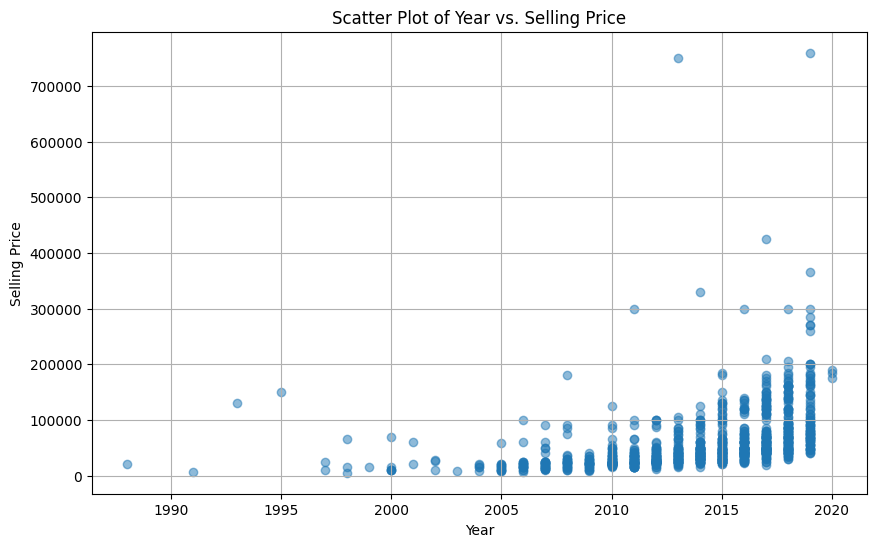

In [ ]:
# ANSWER

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['year'], df['selling_price'], alpha=0.5)
plt.title('Scatter Plot of Year vs. Selling Price')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.grid(True)
plt.show()


In [ ]:
# Q-13-What is the average depreciation in selling price based on the bike's age (current year - manufacturing year) ?

In [ ]:

# Current year
current_year = 2020

# Calculate the bike's age
df['bike_age'] = current_year - df['manufacturing_year']

# Calculate the average depreciation
df['depreciation'] = df['selling_price'].mean() / df['bike_age'].mean()

# Average depreciation per year
average_depreciation_per_year = df['depreciation'].mean()

# Display the result
print(f"Average depreciation in selling price based on the bike's age: {average_depreciation_per_year:.2f}")


In [ ]:
# Q-14-Which bike names are priced significantly above the average price for their manufacturing year

In [ ]:
# Calculate the average selling price for each manufacturing year
df['avg_selling_price'] = df.groupby('year')['selling_price'].transform('mean')

# threshold above value
threshold = 1.5

# Identify bikes priced significantly above the average price for their manufacturing year
significant_bikes = df[df['selling_price'] > threshold * df['avg_selling_price']]

# Select the bike names and their details
significant_bikes = significant_bikes[['name', 'year', 'selling_price', 'avg_selling_price']]

# Display the result
print(significant_bikes)


                                     name  year  selling_price  \
2     Royal Enfield Classic Gunmetal Grey  2018         150000   
7    Royal Enfield Bullet 350 [2007-2011]  2008         180000   
13                          Yamaha YZF R3  2019         365000   
18    Royal Enfield Classic Gunmetal Grey  2018         150000   
23                          Jawa Standard  2019         180000   
..                                    ...   ...            ...   
979             Royal Enfield Thunder 500  2015         105000   
981             Royal Enfield Thunder 350  2013         105000   
983             Royal Enfield Classic 350  2015         100000   
984             Royal Enfield Classic 500  2014          95000   
985             Royal Enfield Classic 500  2011          90000   

     avg_selling_price  
2         87660.374046  
7         34289.285714  
13       119689.511628  
18        87660.374046  
23       119689.511628  
..                 ...  
979       56500.000000  
981    

In [ ]:
# Q-15 - Develop a correlation matrix for numeric columns and visualize it using a heatmap.


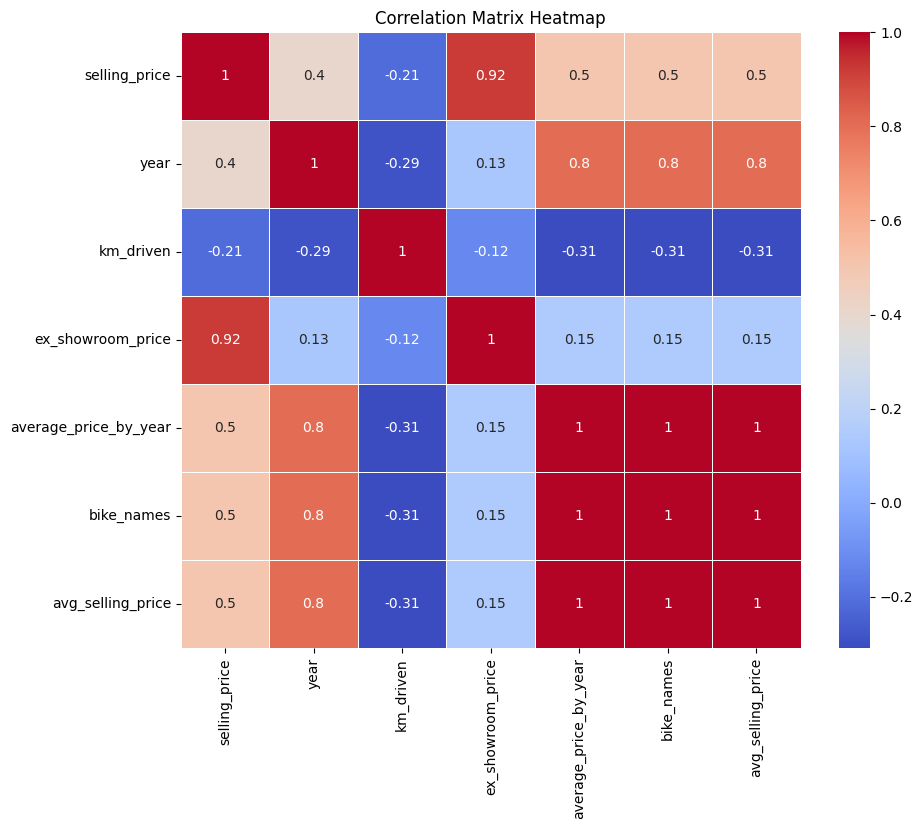

In [ ]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])


# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Show the plot
plt.title('Correlation Matrix Heatmap')
plt.show()


In [ ]:
# ----------------------------EDA 2------------------------------------------------Car_Sales

In [9]:
df1 = pd.read_csv("/content/Car Sale.csv")
df1.head()


,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


In [ ]:
# Q- 1- What is the average selling price of cars for each dealer, and how does it compare across different dealersE


In [ ]:
avg_selling_price = df1.groupby("Dealer_Name")["Price ($)"].mean()
avg_selling_price

,Price ($)
Dealer_Name,
Buddy Storbeck's Diesel Service Inc,27217.261563
C & M Motors Inc,28111.755200
Capitol KIA,28189.703822
Chrysler Plymouth,27555.526400
Chrysler of Tri-Cities,28123.091054
Classic Chevy,28602.014446
Clay Johnson Auto Sales,27816.027113
Diehl Motor CO Inc,27993.929487
Enterprise Rent A Car,28312.580800


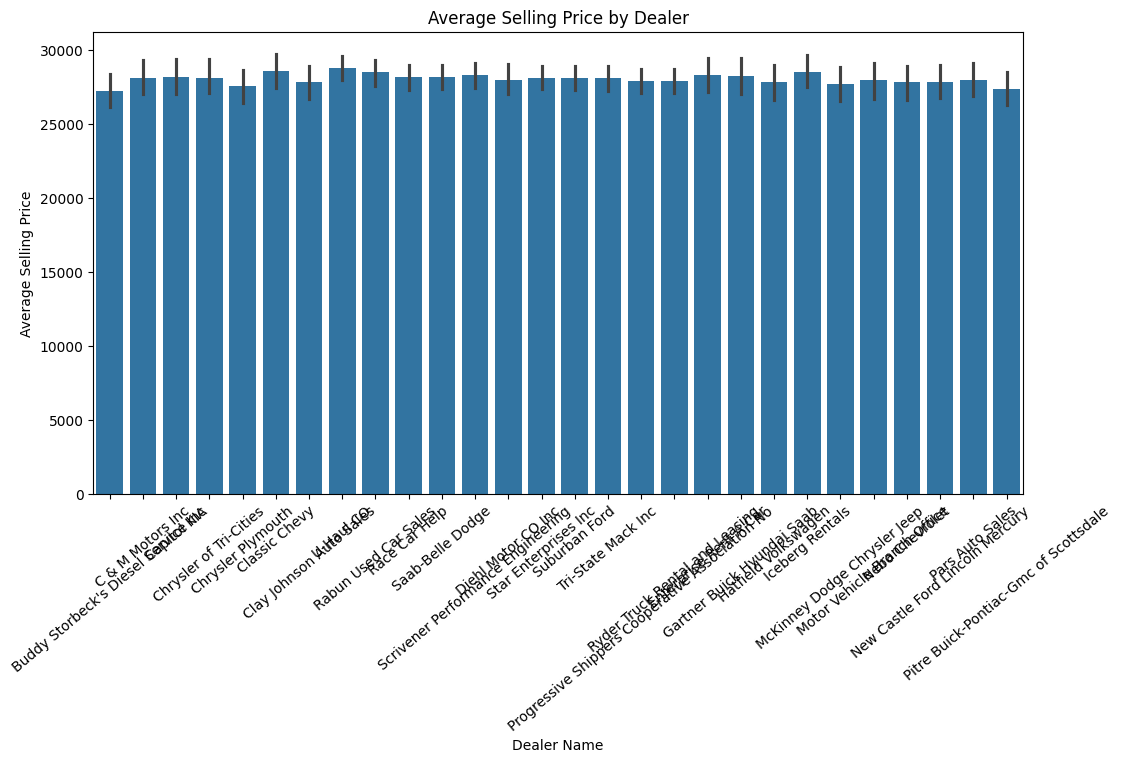

In [ ]:
# compare
plt.figure(figsize=(12,6))
sns.barplot(x="Dealer_Name" , y = "Price ($)" , data = df1)
plt.title("Average Selling Price by Dealer")
plt.xlabel("Dealer Name")
plt.ylabel("Average Selling Price")
plt.xticks(rotation=40)
plt.show()

In [ ]:
# Q- 2- Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing
trends?

In [ ]:
car_brand_variation = df1.groupby("Company")["Price ($)"].std()
car_brand_variation
highest_variation_brand = car_brand_variation.idxmax()
highest_variation_brand

'Lincoln'

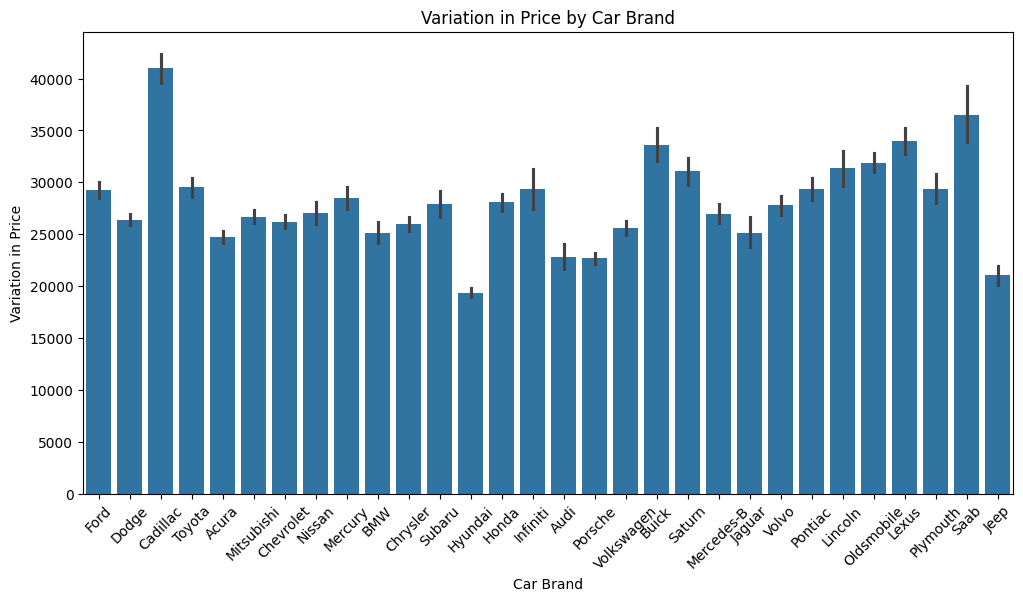

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x="Company", y="Price ($)", data=df1)
plt.title("Variation in Price by Car Brand")
plt.xlabel("Car Brand")
plt.ylabel("Variation in Price")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Q - 3-What is the distribution of car prices for each transmission type, and how do the interquartile ranges
compare?

In [ ]:
car_distribution = df1.groupby("Transmission")["Price ($)"].describe()
car_distribution

,count,mean,std,min,25%,50%,75%,max
Transmission,,,,,,,,
Auto,12571.0,28248.525972,13747.070597,1200.0,19000.0,24000.0,35500.0,75700.0
Manual,11335.0,27914.710631,15862.871978,1700.0,17000.0,22001.0,34000.0,85800.0


In [ ]:
interquartile_range = car_distribution["75%"] - car_distribution["25%"]
interquartile_range

,0
Transmission,
Auto,16500.0
Manual,17000.0


In [ ]:
# Q - 4 - What is the distribution of car prices across different regions?

In [ ]:
car_distribution_region = df1.groupby("Dealer_Region")["Price ($)"].describe()
car_distribution_region

,count,mean,std,min,25%,50%,75%,max
Dealer_Region,,,,,,,,
Aurora,3130.0,28334.626837,15026.207252,9000.0,18001.0,23000.0,35000.0,85800.0
Austin,4135.0,28341.603628,14903.884549,9000.0,18001.0,23801.0,35001.0,85601.0
Greenville,3128.0,28180.819054,15101.538328,1200.0,18001.0,22500.0,34500.0,85200.0
Janesville,3821.0,27833.350955,14344.995638,4300.0,18001.0,23000.0,34000.0,85400.0
Middletown,3128.0,27856.338875,14619.842395,1700.0,18000.0,22750.0,34000.0,85300.0
Pasco,3131.0,28119.039923,14659.315941,9000.0,18500.5,23000.0,34000.0,85600.0
Scottsdale,3433.0,27954.958928,14902.916820,1450.0,18000.0,22600.0,33500.0,85001.0


In [ ]:
# Q- 5- What is the distribution of cars based on body styles?


In [ ]:
car_distribution_body = df1.groupby("Body Style").size()

car_distribution_body

,0
Body Style,
Hardtop,2971
Hatchback,6128
Passenger,3945
SUV,6374
Sedan,4488


In [ ]:
# Q- 6 -How does the average selling price of cars vary by customer gender and annual income?

In [ ]:
avg_selling_price_gender_income = df1.groupby(["Gender","Annual Income"])["Price ($)"].mean()
avg_selling_price_gender_income


Gender  Annual Income
Female  13500            28132.038732
        106000           46001.000000
        121000           20000.000000
        190000           19001.000000
        211000           51000.000000
                             ...     
Male    6600000          39000.000000
        6800000          15000.000000
        7650000          21000.000000
        8000000          85000.000000
        11200000         26001.000000
Name: Price ($), Length: 3442, dtype: float64

In [ ]:
# Q - 7 - What is the distribution of car prices by region, and how does the number of cars sold vary by regionE

In [ ]:
dist_car_price_region = df1.groupby("Dealer_Region")["Price ($)"].describe()
dist_car_price_region

,count,mean,std,min,25%,50%,75%,max
Dealer_Region,,,,,,,,
Aurora,3130.0,28334.626837,15026.207252,9000.0,18001.0,23000.0,35000.0,85800.0
Austin,4135.0,28341.603628,14903.884549,9000.0,18001.0,23801.0,35001.0,85601.0
Greenville,3128.0,28180.819054,15101.538328,1200.0,18001.0,22500.0,34500.0,85200.0
Janesville,3821.0,27833.350955,14344.995638,4300.0,18001.0,23000.0,34000.0,85400.0
Middletown,3128.0,27856.338875,14619.842395,1700.0,18000.0,22750.0,34000.0,85300.0
Pasco,3131.0,28119.039923,14659.315941,9000.0,18500.5,23000.0,34000.0,85600.0
Scottsdale,3433.0,27954.958928,14902.916820,1450.0,18000.0,22600.0,33500.0,85001.0


In [ ]:
number_car_sold_region = df1.groupby("Dealer_Region").size()
number_car_sold_region

,0
Dealer_Region,
Aurora,3130
Austin,4135
Greenville,3128
Janesville,3821
Middletown,3128
Pasco,3131
Scottsdale,3433


In [ ]:
# -Q- 8-  How does the average car price differ between cars with different engine sizes?

In [ ]:
avg_car_price_engine= df1.groupby("Engine")["Price ($)"].mean()
avg_car_price_engine

,Price ($)
Engine,
DoubleÂ Overhead Camshaft,28248.525972
Overhead Camshaft,27914.710631


In [ ]:
# Q-9 - How do car prices vary based on the customer’s annual income bracket?


In [ ]:
car_price_vary_income = df1.groupby("Annual Income")["Price ($)"].describe()
car_price_vary_income

,count,mean,std,min,25%,50%,75%,max
Annual Income,,,,,,,,
10080,1.0,22801.000000,NaN,22801.0,22801.0,22801.0,22801.0,22801.0
13500,5273.0,27878.981415,14904.756077,1200.0,18000.0,22001.0,34000.0,85001.0
24000,1.0,61001.000000,NaN,61001.0,61001.0,61001.0,61001.0,61001.0
85000,1.0,43000.000000,NaN,43000.0,43000.0,43000.0,43000.0,43000.0
106000,1.0,46001.000000,NaN,46001.0,46001.0,46001.0,46001.0,46001.0
...,...,...,...,...,...,...,...,...
6600000,1.0,39000.000000,NaN,39000.0,39000.0,39000.0,39000.0,39000.0
6800000,1.0,15000.000000,NaN,15000.0,15000.0,15000.0,15000.0,15000.0
7650000,1.0,21000.000000,NaN,21000.0,21000.0,21000.0,21000.0,21000.0


In [ ]:
# Q- 10 -What are the top 5 car models with the highest number of sales, and how does their price distribution look?

In [ ]:
top_car_models = df1["Model"].value_counts().head(5)
top_car_models


,count
Model,
Diamante,418
Silhouette,411
Prizm,411
Passat,391
Ram Pickup,383


In [ ]:
price_distribution_top_models = df1[df1["Model"].isin(top_car_models.index)]["Price ($)"].describe()
price_distribution_top_models


,Price ($)
count,2014.000000
mean,24471.639523
std,12620.244409
min,9000.000000
25%,16000.000000
50%,21000.000000
75%,27000.000000
max,60750.000000


In [ ]:
# Q - 11 - How does car price vary with engine size across different car colors, and which colors have the highest price
variation ?

In [14]:
car_price_variation_color = df1.groupby("Color")["Price ($)"].std()
car_price_variation_color
highest_variation_car_color = car_price_variation_color.idxmax()
highest_variation_car_color

'Red'

In [ ]:
 # Q- 12 -Is there any seasonal trend in car sales based on the date of sale?


In [20]:
change_date_format = pd.to_datetime(df1["Date"])
df1["Date"] = change_date_format
df1

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,2022-01-02,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,2022-01-02,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,2022-01-02,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,2022-01-02,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,2022-01-02,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23901,C_CND_023902,2023-12-31,Martin,Male,13500,C & M Motors Inc,Plymouth,Voyager,Overhead Camshaft,Manual,Red,12000,60504-7114,Passenger,8583598,Pasco
23902,C_CND_023903,2023-12-31,Jimmy,Female,900000,Ryder Truck Rental and Leasing,Chevrolet,Prizm,DoubleÂ Overhead Camshaft,Auto,Black,16000,06457-3834,Hardtop,7914229,Middletown
23903,C_CND_023904,2023-12-31,Emma,Male,705000,Chrysler of Tri-Cities,BMW,328i,Overhead Camshaft,Manual,Red,21000,99301-3882,Sedan,7659127,Scottsdale
23904,C_CND_023905,2023-12-31,Victoire,Male,13500,Chrysler Plymouth,Chevrolet,Metro,DoubleÂ Overhead Camshaft,Auto,Black,31000,53546-9427,Passenger,6030764,Austin


In [21]:
seasonal_trend = df1.groupby(df1["Date"].dt.month)["Price ($)"].mean()
seasonal_trend

,Price ($)
Date,
1,27463.567089
2,28087.000000
3,27169.949837
4,28316.878550
5,28085.088654
6,28283.324781
7,27929.293913
8,28617.969501
9,28331.370045


In [ ]:
# - Q -13 - How does the car price distribution change when considering different combinations of body style and
transmission type?

In [22]:
car_price_distribution = df1.groupby(["Body Style", "Transmission"])["Price ($)"].describe()
car_price_distribution

count          mean           std      min      25%  \
Body Style Transmission                                                         
Hardtop    Auto          1408.0  31520.188210  13687.756740  12000.0  21001.0   
           Manual        1563.0  27016.943698  14072.501848  11000.0  17575.5   
Hatchback  Auto          3458.0  25910.544824  13144.014337   4200.0  18001.0   
           Manual        2670.0  28702.550562  16284.049616   1700.0  17000.0   
Passenger  Auto          2020.0  28915.835149  13946.481932   9000.0  19000.0   
           Manual        1925.0  28969.521039  18523.684163  10000.0  16001.0   
SUV        Auto          3086.0  27501.404407  13299.927913   1200.0  19000.0   
           Manual        3288.0  26079.019161  14621.526541   2200.0  17000.0   
Sedan      Auto          2599.0  29955.294344  14310.910860  12000.0  19000.0   
           Manual        1889.0  29664.271572  15440.056434  11000.0  19001.0   

                             50%      75%      max  
Body Style Transmission                             
Hardtop    Auto          27000.0  43125.0  75501.0  
           Manual        22001.0  29000.0  82500.0  
Hatchback  Auto          21500.0  31000.0  75700.0  
           Manual        23000.0  36001.0  85600.0  
Passenger  Auto          25000.0  38000.0  69801.0  
           Manual        22000.0  37000.0  85800.0  
SUV        Auto          25000.0  33000.0  75501.0  
           Manual        22000.0  28000.0  85500.0  
Sedan      Auto          26000.0  39500.0  69980.0  
           Manual        25000.0  36600.0  69700.0

In [ ]:
# Q- 14 - What is the correlation between car price, engine size, and annual income of customers, and how do these
features interact?

In [24]:
corr_car_price = df1.groupby("Engine")[["Price ($)", "Annual Income"]].corr()
corr_car_price

Price ($)  Annual Income
Engine                                                           
DoubleÂ Overhead Camshaft Price ($)       1.000000       0.023363
                          Annual Income   0.023363       1.000000
Overhead Camshaft         Price ($)       1.000000       0.001084
                          Annual Income   0.001084       1.000000

In [ ]:
# Q - 15 - How does the average car price vary across different car models and engine types?

In [25]:
avg_car_price_vary = df1.groupby(["Model", "Engine"])["Price ($)"].mean()
avg_car_price_vary

Model     Engine                   
3-Sep     DoubleÂ Overhead Camshaft    37986.380117
3000GT    DoubleÂ Overhead Camshaft    22764.326923
          Overhead Camshaft            21770.659864
300M      DoubleÂ Overhead Camshaft    21394.888889
323i      DoubleÂ Overhead Camshaft    16744.632287
                                           ...     
Windstar  Overhead Camshaft            17100.272727
Wrangler  DoubleÂ Overhead Camshaft    21145.294737
          Overhead Camshaft            18742.942029
Xterra    DoubleÂ Overhead Camshaft    15940.459459
          Overhead Camshaft            31072.500000
Name: Price ($), Length: 261, dtype: float64

In [ ]:
# ---------------- EDA 3 ----------------Amazon Sales Data--------

In [28]:
df2 = pd.read_csv("/content/amazon.csv")
df2.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [ ]:
# Q - 1 ' What is the average rating for each product category?

In [32]:
df2["rating"] = pd.to_numeric(df2["rating"], errors='coerce')


In [33]:
avg_rating_category = df2.groupby("product_name")["rating"].mean()
avg_rating_category

,rating
product_name,
!!1000 Watt/2000-Watt Room Heater!! Fan Heater!!Pure White!!HN-2500!!Made in India!!,4.5
!!HANEUL!!1000 Watt/2000-Watt Room Heater!! Fan Heater!!Pure White!!HN-2500!!Made in India!!Thermoset!!,3.4
"10WeRun Id-116 Bluetooth Smartwatch Wireless Fitness Band for Boys, Girls, Men, Women & Kids | Sports Gym Watch for All Smart Phones I Heart Rate and spo2 Monitor",4.1
"10k 8k 4k HDMI Cable, Certified 48Gbps 1ms Ultra High Speed HDMI 2.1 Cable 4k 120Hz 144Hz 2k 165Hz 8k 60Hz Dynamic HDR ARC eARC DTS:X Compatible for Mac Gaming PC Soundbar TV Monitor Laptop PS5 4 Xbox",4.6
"3M Post-it Sticky Note Cube, 200 Sheets (4 Colors x 50 Sheets) | 3"" x 3"" Size | For notes, reminders, study, school and organizing",4.4
...,...
"realme Buds Wireless in Ear Bluetooth Earphones with mic, 11.2mm Bass Boost Driver, Magnetic Fast Pair, Fast Charging and 12 Hrs Playtime (Yellow)",4.1
"realme narzo 50 (Speed Blue, 4GB RAM+64GB Storage) Helio G96 Processor | 50MP AI Triple Camera | 120Hz Ultra Smooth Display",4.2
"realme narzo 50i (Mint Green, 2GB RAM+32GB Storage) Octa Core Processor | 6.5"" inch Large Display",4.0


In [ ]:
# Q- 2-' What are the top rating_count products by category?

In [34]:
top_rating_count_products = df2.groupby("product_name")["rating_count"].sum()
top_rating_count_products

,rating_count
product_name,
!!1000 Watt/2000-Watt Room Heater!! Fan Heater!!Pure White!!HN-2500!!Made in India!!,11
!!HANEUL!!1000 Watt/2000-Watt Room Heater!! Fan Heater!!Pure White!!HN-2500!!Made in India!!Thermoset!!,15
"10WeRun Id-116 Bluetooth Smartwatch Wireless Fitness Band for Boys, Girls, Men, Women & Kids | Sports Gym Watch for All Smart Phones I Heart Rate and spo2 Monitor",412
"10k 8k 4k HDMI Cable, Certified 48Gbps 1ms Ultra High Speed HDMI 2.1 Cable 4k 120Hz 144Hz 2k 165Hz 8k 60Hz Dynamic HDR ARC eARC DTS:X Compatible for Mac Gaming PC Soundbar TV Monitor Laptop PS5 4 Xbox","3,664"
"3M Post-it Sticky Note Cube, 200 Sheets (4 Colors x 50 Sheets) | 3"" x 3"" Size | For notes, reminders, study, school and organizing","7,429"
...,...
"realme Buds Wireless in Ear Bluetooth Earphones with mic, 11.2mm Bass Boost Driver, Magnetic Fast Pair, Fast Charging and 12 Hrs Playtime (Yellow)","72,563"
"realme narzo 50 (Speed Blue, 4GB RAM+64GB Storage) Helio G96 Processor | 50MP AI Triple Camera | 120Hz Ultra Smooth Display","13,246"
"realme narzo 50i (Mint Green, 2GB RAM+32GB Storage) Octa Core Processor | 6.5"" inch Large Display","30,907"


In [ ]:
# Q- 3 What is the distribution of discounted prices vs. actual prices?


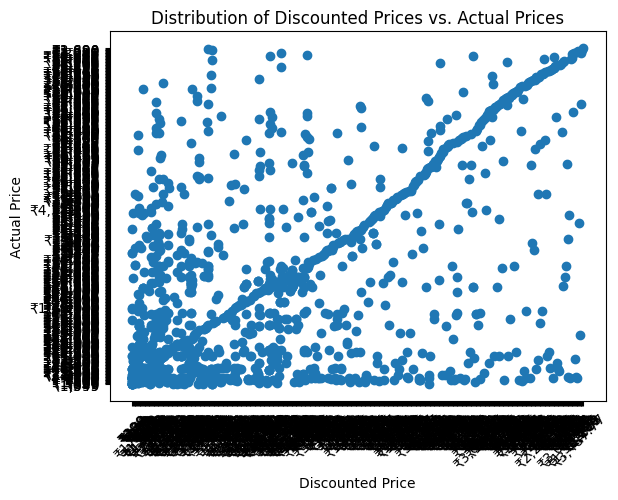

In [38]:
plt.scatter(x="discounted_price", y="actual_price", data=df2)
plt.title("Distribution of Discounted Prices vs. Actual Prices")
plt.xlabel("Discounted Price")
plt.ylabel("Actual Price")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Q- 4 How does the average discount percentage vary across categories?

In [40]:
convert_discount_percentage = df2["discount_percentage"].str.replace("%", "").astype(float)
df2["discount_percentage"] = convert_discount_percentage

In [41]:
avg_discount_percentage = df2.groupby("product_name")["discount_percentage"].mean()
avg_discount_percentage

,discount_percentage
product_name,
!!1000 Watt/2000-Watt Room Heater!! Fan Heater!!Pure White!!HN-2500!!Made in India!!,51.0
!!HANEUL!!1000 Watt/2000-Watt Room Heater!! Fan Heater!!Pure White!!HN-2500!!Made in India!!Thermoset!!,44.0
"10WeRun Id-116 Bluetooth Smartwatch Wireless Fitness Band for Boys, Girls, Men, Women & Kids | Sports Gym Watch for All Smart Phones I Heart Rate and spo2 Monitor",74.0
"10k 8k 4k HDMI Cable, Certified 48Gbps 1ms Ultra High Speed HDMI 2.1 Cable 4k 120Hz 144Hz 2k 165Hz 8k 60Hz Dynamic HDR ARC eARC DTS:X Compatible for Mac Gaming PC Soundbar TV Monitor Laptop PS5 4 Xbox",58.0
"3M Post-it Sticky Note Cube, 200 Sheets (4 Colors x 50 Sheets) | 3"" x 3"" Size | For notes, reminders, study, school and organizing",49.0
...,...
"realme Buds Wireless in Ear Bluetooth Earphones with mic, 11.2mm Bass Boost Driver, Magnetic Fast Pair, Fast Charging and 12 Hrs Playtime (Yellow)",16.0
"realme narzo 50 (Speed Blue, 4GB RAM+64GB Storage) Helio G96 Processor | 50MP AI Triple Camera | 120Hz Ultra Smooth Display",19.0
"realme narzo 50i (Mint Green, 2GB RAM+32GB Storage) Octa Core Processor | 6.5"" inch Large Display",6.0


In [ ]:
# Q -5-' What are the most popular product names?

In [46]:
most_popular_products = df2["product_name"].value_counts()
most_popular_products

,count
product_name,
"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Watch with Bluetooth Calling, AI Voice Assistance, 100 Sports Modes IP67 Rating, 240*280 Pixel High Resolution",5
"Fire-Boltt Phoenix Smart Watch with Bluetooth Calling 1.3"",120+ Sports Modes, 240*240 PX High Res with SpO2, Heart Rate Monitoring & IP67 Rating",4
"Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini (3 FT Pack of 1, Grey)",3
MI Braided USB Type-C Cable for Charging Adapter (Red),3
"Amazonbasics Nylon Braided Usb-C To Lightning Cable, Fast Charging Mfi Certified Smartphone, Iphone Charger (6-Foot, Dark Grey)",3
...,...
"SanDisk Ultra microSD UHS-I Card 64GB, 120MB/s R",1
"Noise ColorFit Ultra SE Smart Watch with 1.75""(4.3cm) HD Display, Aluminium Alloy Body, 60 Sports Modes, Spo2, Lightweight, Stock Market Info, Calls & SMS Reply (Vintage Brown)",1
Nokia 150 (2020) (Cyan),1


In [ ]:
# Q-6 - What are the most popular product keywords?

In [47]:
popular_product_keywords = df2["category"].value_counts()
popular_product_keywords

,count
category,
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,233
Electronics|WearableTechnology|SmartWatches,76
Electronics|Mobiles&Accessories|Smartphones&BasicMobiles|Smartphones,68
"Electronics|HomeTheater,TV&Video|Televisions|SmartTelevisions",63
"Electronics|Headphones,Earbuds&Accessories|Headphones|In-Ear",52
...,...
Electronics|Cameras&Photography|Accessories|Batteries&Chargers|BatteryChargers,1
Computers&Accessories|NetworkingDevices|DataCards&Dongles,1
Electronics|HomeAudio|Speakers|MultimediaSpeakerSystems,1


In [ ]:
# Q- 7 - What are the most popular product reviews?

In [51]:
most_popular_reviews = df2["review_title"].value_counts()
most_popular_reviews.head()


,count
review_title,
"Worked on iPhone 7 and didn’t work on XR,Good one,Dull Physical Looks,Just Buy it,Go for it,About the product,Get charging cable at the price,Working well.",10
"Satisfied,Charging is really fast,Value for money,Product review,Good quality,Good product,Good Product,As of now seems good",8
"Phone, camera, heating - works for me, may not for all,Good Mobile,Good but not excellent under this budget,Worth the price at 9499,Ok type phone... but unable to make videocall within same service provider.,Phone review,Budget king,Battery backup is good",8
"Good product,Good one,Nice,Really nice product,Very first time change,Good,Fine product but could be better,Very nice it's charging like jet",7
"A Good Braided Cable for Your Type C Device,Good quality product from ambrane,Super cable,As,Good quality,Good product,its good,Good quality for the price but one issue with my unit",7


In [ ]:
# Q-8-' What is the correlation between discounted_price and rating?


In [54]:
convert_discounted_price = pd.to_numeric(df2["discounted_price"], errors='coerce')
df2["discounted_price"] = convert_discounted_price

In [55]:
corr_discounted_price_rating = df2[["discounted_price", "rating"]].corr()
corr_discounted_price_rating

,discounted_price,rating
discounted_price,NaN,NaN
rating,NaN,1.0


In [ ]:
# Q- 9 -' What are the Top 5 categories based on the highest ratings

In [56]:
top_five_categories = df2.groupby("product_name")["rating"].mean().sort_values(ascending=False).head(5)
top_five_categories

,rating
product_name,
"Amazon Basics Wireless Mouse | 2.4 GHz Connection, 1600 DPI | Type - C Adapter | Upto 12 Months of Battery Life | Ambidextrous Design | Suitable for PC/Mac/Laptop",5.0
"Syncwire LTG to USB Cable for Fast Charging Compatible with Phone 5/ 5C/ 5S/ 6/ 6S/ 7/8/ X/XR/XS Max/ 11/12/ 13 Series and Pad Air/Mini, Pod & Other Devices (1.1 Meter, White)",5.0
"REDTECH USB-C to Lightning Cable 3.3FT, [Apple MFi Certified] Lightning to Type C Fast Charging Cord Compatible with iPhone 14/13/13 pro/Max/12/11/X/XS/XR/8, Supports Power Delivery - White",5.0
"Instant Pot Air Fryer, Vortex 2QT, Touch Control Panel, 360° EvenCrisp™ Technology, Uses 95 % less Oil, 4-in-1 Appliance: Air Fry, Roast, Bake, Reheat (Vortex 1.97Litre, Black)",4.8
"Swiffer Instant Electric Water Heater Faucet Tap Home-Kitchen Instantaneous Water Heater Tank less for Tap, LED Electric Head Water Heaters Tail Gallon Comfort(3000W) ((Pack of 1))",4.8


In [ ]:
# Q- 10  Identify any potential areas for improvement or optimization based on the data analysis

In [57]:
data_analysis = df2.groupby("product_name")["rating"].mean()
data_analysis

,rating
product_name,
!!1000 Watt/2000-Watt Room Heater!! Fan Heater!!Pure White!!HN-2500!!Made in India!!,4.5
!!HANEUL!!1000 Watt/2000-Watt Room Heater!! Fan Heater!!Pure White!!HN-2500!!Made in India!!Thermoset!!,3.4
"10WeRun Id-116 Bluetooth Smartwatch Wireless Fitness Band for Boys, Girls, Men, Women & Kids | Sports Gym Watch for All Smart Phones I Heart Rate and spo2 Monitor",4.1
"10k 8k 4k HDMI Cable, Certified 48Gbps 1ms Ultra High Speed HDMI 2.1 Cable 4k 120Hz 144Hz 2k 165Hz 8k 60Hz Dynamic HDR ARC eARC DTS:X Compatible for Mac Gaming PC Soundbar TV Monitor Laptop PS5 4 Xbox",4.6
"3M Post-it Sticky Note Cube, 200 Sheets (4 Colors x 50 Sheets) | 3"" x 3"" Size | For notes, reminders, study, school and organizing",4.4
...,...
"realme Buds Wireless in Ear Bluetooth Earphones with mic, 11.2mm Bass Boost Driver, Magnetic Fast Pair, Fast Charging and 12 Hrs Playtime (Yellow)",4.1
"realme narzo 50 (Speed Blue, 4GB RAM+64GB Storage) Helio G96 Processor | 50MP AI Triple Camera | 120Hz Ultra Smooth Display",4.2
"realme narzo 50i (Mint Green, 2GB RAM+32GB Storage) Octa Core Processor | 6.5"" inch Large Display",4.0


In [58]:
# We need to improve price variation in actual and discounted price
# We can work on product service for more positive ratings .
# For low ROI products we can optimise sales matrix
# We can work on more SEO and nomencalature part for enhancing categories .

In [ ]:
# -------------------EDA 4 --------------------------Spotify Data--------------------

In [60]:
df3 = pd.read_csv("/content/spotify.csv")
df3.head()

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe


In [ ]:
# Q- 1 - Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do
the needful?

In [71]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Artist         440 non-null    object
 1   Track Name     440 non-null    object
 2   Popularity     440 non-null    int64 
 3   Duration (ms)  440 non-null    int64 
 4   Track ID       440 non-null    object
dtypes: int64(2), object(3)
memory usage: 17.3+ KB


In [61]:
df3.isnull().sum()

,0
Artist,0
Track Name,0
Popularity,0
Duration (ms),0
Track ID,0


In [62]:
df3.duplicated().sum()

27

In [68]:
df3.remove_duplicates = df3.drop_duplicates()
df3.remove_duplicates.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
433,False
434,False
436,False
437,False


In [ ]:
# Q - 2-  What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram?

In [73]:
dis_popularity = df3["Popularity"].value_counts()
dis_popularity

,count
Popularity,
79,23
76,23
84,20
78,20
71,18
82,18
77,18
85,17
75,16


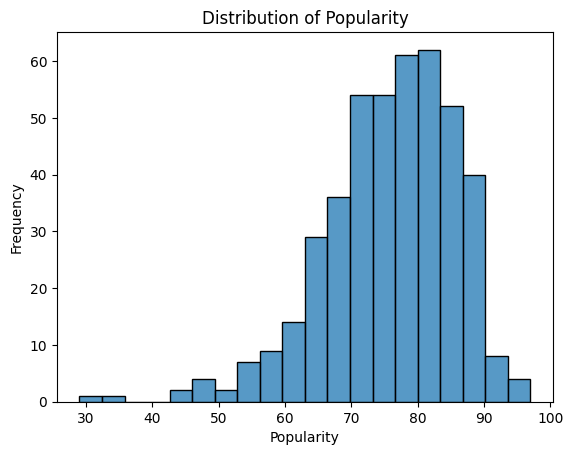

In [74]:
sns.histplot(df3["Popularity"])
plt.title("Distribution of Popularity")
plt.xlabel("Popularity")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# Q- 3- Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot?


In [76]:
rel_popularity_duration = df3.groupby("Popularity")["Duration (ms)"].mean()
rel_popularity_duration

,Duration (ms)
Popularity,
29,171000.000000
35,212853.000000
44,221863.000000
47,135444.000000
48,259333.000000
49,179573.000000
51,178413.000000
52,239440.000000
53,272320.000000


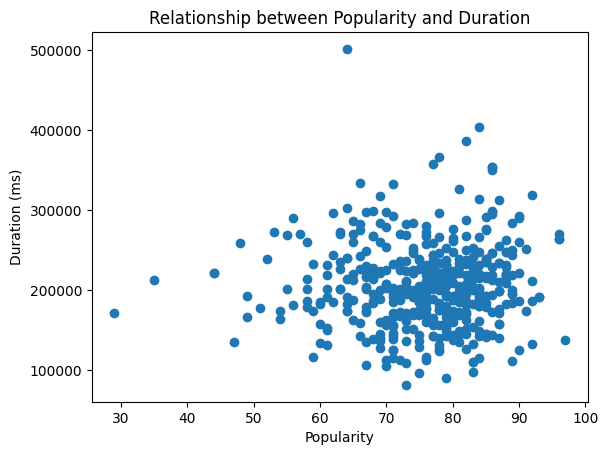

In [77]:
plt.scatter(x="Popularity", y="Duration (ms)", data=df3)
plt.title("Relationship between Popularity and Duration")
plt.xlabel("Popularity")
plt.ylabel("Duration (ms)")
plt.show()

In [ ]:
# Q- 4- Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using
a countplot.

In [78]:
artist_highest_tracks = df3["Artist"].value_counts()
artist_highest_tracks

,count
Artist,
Drake,20
Travis Scott,12
21 Savage,11
¥$,11
Lil Nas X,11
...,...
Arizona Zervas,1
Fivio Foreign,1
Pressa,1


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

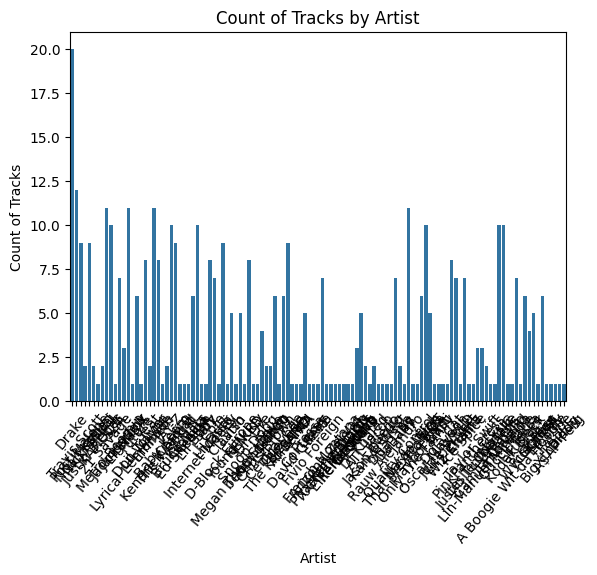

In [84]:
sns.countplot(x="Artist", data=df3)
plt.title("Count of Tracks by Artist")
plt.xlabel("Artist")
plt.ylabel("Count of Tracks")
plt.xticks(rotation=50)
plt

In [ ]:
# Q - 5- What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each

In [85]:
least_popular_tracks = df3.sort_values(by="Popularity").head(5)
least_popular_tracks

,Artist,Track Name,Popularity,Duration (ms),Track ID
207,Pressa,Attachments (feat. Coi Leray),29,171000,6EfJ8Ct3GHbBz2YlyPnMYb
231,Justin Bieber,Intentions,35,212853,7jAVt70Xdg8EwOtsFB1ZqK
435,French Montana,Splash Brothers,44,221863,3fBsEOnzwtlkpS0LxXAZhN
413,French Montana,Splash Brothers,44,221863,3fBsEOnzwtlkpS0LxXAZhN
225,Lil Baby,On Me - Remix,47,135444,2uUFVnVFERNxUdcmvEs7LB


In [ ]:
# Q - 6  Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and
display the average popularity for each artist?

In [90]:
top_five_artist = df3.groupby("Artist")["Popularity"].count().sort_values(ascending = False).head()
top_five_artist

,Popularity
Artist,
Drake,20
Travis Scott,12
¥$,11
Lil Nas X,11
Eminem,11


In [91]:
calc_avg_popularity = df3.groupby("Artist")["Popularity"].mean()
calc_avg_popularity

,Popularity
Artist,
*NSYNC,67.000000
2 Chainz,72.000000
21 Savage,84.181818
A Boogie Wit da Hoodie,80.000000
A$AP Ferg,69.000000
...,...
Young Nudy,67.000000
Young Thug,73.750000
benny blanco,72.000000


In [92]:
show_highest_avg_popularity = calc_avg_popularity.idxmax()
show_highest_avg_popularity

'cassö'

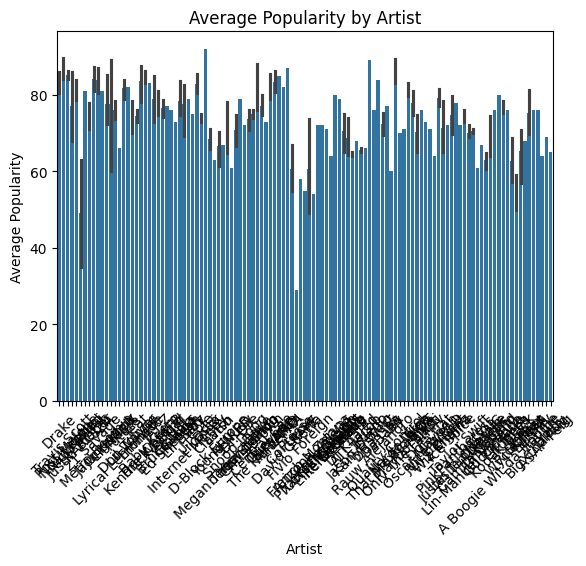

In [94]:
sns.barplot(x="Artist", y="Popularity", data=df3)
plt.title("Average Popularity by Artist")
plt.xlabel("Artist")
plt.ylabel("Average Popularity")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Q- 7 -For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist?

In [95]:
top_five_popular_artist = df3.groupby("Artist")["Popularity"].count().sort_values(ascending = False).head()
top_five_popular_artist

,Popularity
Artist,
Drake,20
Travis Scott,12
¥$,11
Lil Nas X,11
Eminem,11


In [97]:
most_popular_tracks = df3.groupby("Artist")["Track Name"].first()
most_popular_tracks

,Track Name
Artist,
*NSYNC,Better Place (Reunion)
2 Chainz,We Own It (Fast & Furious)
21 Savage,née-nah
A Boogie Wit da Hoodie,Drowning (feat. Kodak Black)
A$AP Ferg,"Work REMIX (feat. A$AP Rocky, French Montana, ..."
...,...
Young Nudy,Peaches & Eggplants (feat. Latto & Sexyy Red)
Young Thug,pick up the phone
benny blanco,Bad Decisions (with BTS & Snoop Dogg)


In [98]:
track_name_for_each_artist = df3.groupby("Artist")["Track Name"].apply(list)
track_name_for_each_artist

,Track Name
Artist,
*NSYNC,[Better Place (Reunion)]
2 Chainz,[We Own It (Fast & Furious)]
21 Savage,"[née-nah, redrum, née-nah, n.h.i.e., Glock In ..."
A Boogie Wit da Hoodie,[Drowning (feat. Kodak Black)]
A$AP Ferg,"[Work REMIX (feat. A$AP Rocky, French Montana,..."
...,...
Young Nudy,[Peaches & Eggplants (feat. Latto & Sexyy Red)]
Young Thug,"[pick up the phone, Hot (Remix) [feat. Gunna a..."
benny blanco,[Bad Decisions (with BTS & Snoop Dogg)]


In [ ]:
# Q - 8 -Visualize relationships between multiple numerical variables simultaneously using a pair plot?


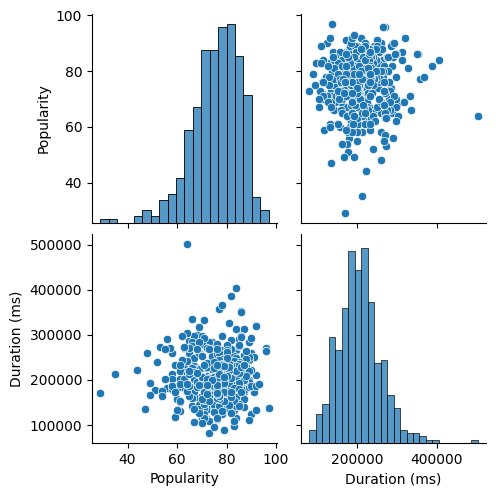

In [99]:
pair_plot = sns.pairplot(df3)
plt.show()

In [ ]:
# Q - 9 -Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or
violin plot?

In [100]:
duration_track_artist = df3.groupby("Artist")["Duration (ms)"].mean()
duration_track_artist

,Duration (ms)
Artist,
*NSYNC,135426.000000
2 Chainz,227906.000000
21 Savage,216150.454545
A Boogie Wit da Hoodie,209269.000000
A$AP Ferg,283693.000000
...,...
Young Nudy,217213.000000
Young Thug,229421.750000
benny blanco,172714.000000


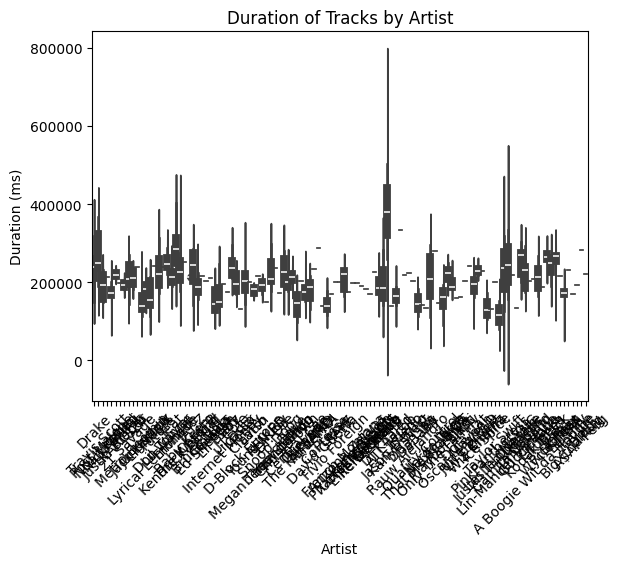

In [103]:
violin_plot = sns.violinplot(x="Artist", y="Duration (ms)", data=df3)
plt.title("Duration of Tracks by Artist")
plt.xlabel("Artist")
plt.ylabel("Duration (ms)")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Q - 10 - How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a
violin plot.

In [105]:
track_name_for_each_artist = df3.groupby("Artist")["Popularity"].apply(list)
track_name_for_each_artist

,Popularity
Artist,
*NSYNC,[67]
2 Chainz,[72]
21 Savage,"[88, 96, 88, 86, 86, 84, 84, 82, 79, 80, 73]"
A Boogie Wit da Hoodie,[80]
A$AP Ferg,[69]
...,...
Young Nudy,[67]
Young Thug,"[74, 76, 76, 69]"
benny blanco,[72]


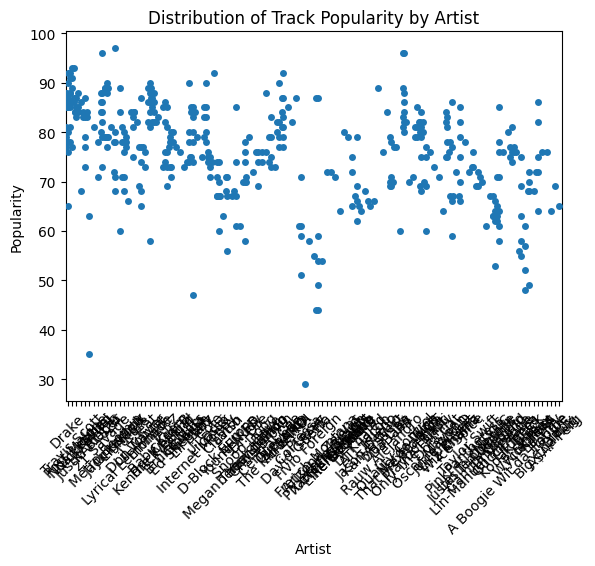

In [108]:
Swarm_plot = sns.swarmplot(x="Artist", y="Popularity", data=df3)
plt.title("Distribution of Track Popularity by Artist")
plt.xlabel("Artist")
plt.ylabel("Popularity")
plt.xticks(rotation=45)
plt.show()

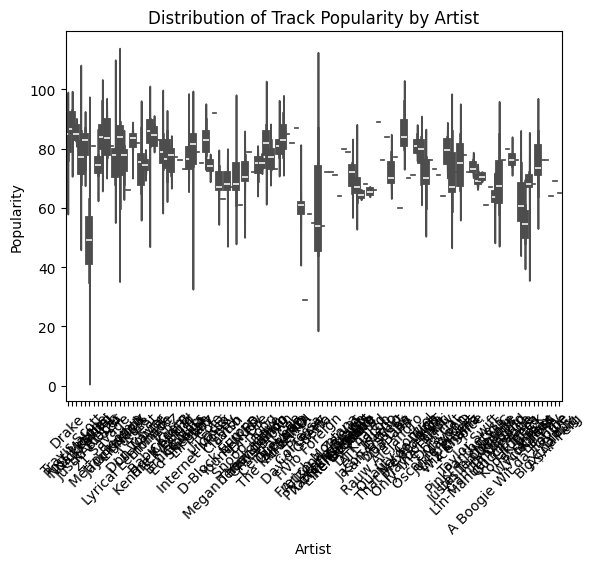

In [116]:
violin_plot = sns.violinplot(x="Artist", y="Popularity", data=df3,color = "blue")
plt.title("Distribution of Track Popularity by Artist")
plt.xlabel("Artist")
plt.ylabel("Popularity")
plt.xticks(rotation=45)
plt.show()

In [ ]:
#--------------------------End of Assignement-------------------------------------------